# Introduction

- We predicted the "conversion" evens by identifying critical features by combining the all of these 1000 features. With these critical features, we sampled the same number of position and negative instances in the training set, after that we used "decision tree" "random forest" "adaboost" "gradient boosting" etc. algorithms to predicte the "conversion" events from customers.  The higest mean  CV score for the training data set is from "random forest" which is 67.3, and the highest accuracy is 69.3% in the validation set with "random forest" algorithms.  

# Data Preparation

In [577]:
import pandas as pd
import ast

def load(file):

    df = pd.read_csv(file)
    
    # convert the column values from literal string to dictionary
    df['ltiFeatures'] = df['ltiFeatures'].apply(ast.literal_eval)
    df['stiFeatures'] = df['stiFeatures'].apply(ast.literal_eval)

    return df

# load all the data
training = load("valassis_dataset/training.csv")
validation = load("valassis_dataset/validation.csv")
interest_topics = pd.read_csv("valassis_dataset/interest_topics.csv")

# inspect the data
validation.head()

,userID,inAudience,ltiFeatures,stiFeatures
0,0,True,"{'89': 0.0027281240558934, '1264': 0.001862958...",{}
1,1,True,"{'47': 0.0019292939671486482, '1187': 0.012261...",{}
2,2,True,"{'45': 0.001961152113619305, '47': 0.001584126...",{}
3,3,True,"{'1253': 0.006566573072362829, '1164': 0.00327...",{}
4,4,True,"{'78': 0.013096540307802428, '1198': 0.0025546...",{}


In [8]:
interest_topics.head()

,topic_id,topic_name
0,3,/Arts & Entertainment
1,5,/Computers & Electronics
2,7,/Finance
3,8,/Games
4,11,/Home & Garden


In [9]:
training.head()

,userID,inAudience,ltiFeatures,stiFeatures
0,1,True,"{'45': 0.020536141517834786, '47': 0.003117529...",{}
1,2,True,"{'45': 0.001158253110658664, '592': 0.01546380...",{}
2,3,True,"{'908': 0.002470851264264668, '590': 0.0021402...",{}
3,4,True,"{'1187': 0.001127974558171163, '1780': 0.00117...",{}
4,5,True,"{'907': 0.025339209040149392, '1187': 0.006020...","{'907': 0.10445132121076425, '908': 0.05651522..."


## Inspect the training dataset's inAudience value

In [10]:
training.groupby('inAudience').size()

inAudience
False    94941
True      1465
dtype: int64

 After inspecting the inAudience value of the training dataset,we found that the dataset is imbalanced, therefore, we decide to resample the data before applying our model

# Feature Engineering

- We first extracted the main topic from the $\textit{topic_name}$ feature and created a $\textbf{main_topic_mapping}$ dictionary structure to store the $\textit{main_topic}$ as the $\textbf{key}$ and a list structure that holds different $\textit{topic_id}$ that belongs to the same main topic.
- Then we reasoned that it is possible for a user that has more detailed interests to be converted. By this we mean that if a user has interests in lots of subtopics then it is more possible that the user would be convereted. Therefore, we create a new feature that called $\textit{topic_name}$ to count the layers a topic have.

In [578]:
interest_topics['main_topic'] = interest_topics['topic_name'].str.split('/',expand = True)[1]
interest_topics['sub_topics'] = interest_topics['topic_name'].str.count('/')-1
interest_topics

,topic_id,topic_name,main_topic,sub_topics
0,3,/Arts & Entertainment,Arts & Entertainment,0
1,5,/Computers & Electronics,Computers & Electronics,0
2,7,/Finance,Finance,0
3,8,/Games,Games,0
4,11,/Home & Garden,Home & Garden,0
5,12,/Business & Industrial,Business & Industrial,0
6,13,/Internet & Telecom,Internet & Telecom,0
7,14,/People & Society,People & Society,0
8,16,/News,News,0
9,18,/Shopping,Shopping,0


In [579]:
main_topic_mapping = {} # A dictionary structure key:main_topic values:[topic_id]
topic_id_list = interest_topics['topic_id']
main_topics = interest_topics['main_topic']
for main_topic,tid in zip(main_topics,topic_id_list):
    if main_topic not in main_topic_mapping:
        main_topic_mapping[main_topic] = []
    else:
        main_topic_mapping[main_topic].append(str(tid))
sub_topics_mapping = interest_topics['sub_topics'] 

- After doing the feature engineering on the $\textbf{interest_topics}$ dataset, we used two mappings that we extracted to aggregate the interest proportions for each user in the training dataset. One reasons for aggregating the interest proportions is to simplify the amounts of features, and another reason for aggregating the interest proportions is that we found some user would have interests in some sub topics that have the same main topic. Therefore, it is reasonale to aggregate the interest proportions.
- We then used the $\textbf{sub_topics_mapping}$ to compute the total sub topics interested for each user.

In [580]:
def aggregateInterest(df,main_topic_mapping):
    features = ['ltiFeatures','stiFeatures']
    for feature in features:
        df_feature = df[feature]
        for main_topic in main_topic_mapping:
            aggInt = pd.DataFrame.from_records(df_feature,columns = np.array(main_topic_mapping[main_topic]))
            aggInt.fillna(0)
            if feature == 'ltiFeatures':
                df[main_topic+'_l'] = aggInt.sum(axis=1)
            else:
                df[main_topic+'_s'] = aggInt.sum(axis=1)
    return df
def computeSubTopics(df,sub_topics_mapping):
    sub_topics = []
    for user in df['ltiFeatures']:
        tot = 0
        for interest in user:
            if int(interest) not in sub_topics_mapping:
                continue
            tot = tot + sub_topics_mapping[int(interest)]
        sub_topics.append(tot)
    df['sub_topics'] = np.array(sub_topics)
    return df

In [615]:
df_test = aggregateInterest(training,main_topic_mapping)
df_test = computeSubTopics(df,sub_topics_mapping)
df_test.head()

,userID,inAudience,ltiFeatures,stiFeatures,Arts & Entertainment_l,Computers & Electronics_l,Finance_l,Games_l,Home & Garden_l,Business & Industrial_l,...,Health_s,Autos & Vehicles_s,Jobs & Education_s,Hobbies & Leisure_s,Pets & Animals_s,Travel_s,Food & Drink_s,Reference_s,Science_s,sub_topics
0,1,True,"{'45': 0.020536141517834786, '47': 0.003117529...",{},0.017379,0.001301,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,109
1,2,True,"{'45': 0.001158253110658664, '592': 0.01546380...",{},0.087566,0.000000,0.000000,0.013485,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,92
2,3,True,"{'908': 0.002470851264264668, '590': 0.0021402...",{},0.182117,0.000000,0.007259,0.007713,0.025815,0.001557,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,201
3,4,True,"{'1187': 0.001127974558171163, '1780': 0.00117...",{},0.044449,0.008420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,65
4,5,True,"{'907': 0.025339209040149392, '1187': 0.006020...","{'907': 0.10445132121076425, '908': 0.05651522...",0.121597,0.010235,0.006334,0.000000,0.012078,0.005321,...,0.720543,0.151606,0.146188,0.126159,0.03623,0.146058,1.659165,0.101822,0.007141,147


In [616]:
df_val = aggregateInterest(validation,main_topic_mapping)
df_val = computeSubTopics(df_val,sub_topics_mapping)
df_val.head()

,userID,inAudience,ltiFeatures,stiFeatures,Arts & Entertainment_l,Computers & Electronics_l,Finance_l,Games_l,Home & Garden_l,Business & Industrial_l,...,Health_s,Autos & Vehicles_s,Jobs & Education_s,Hobbies & Leisure_s,Pets & Animals_s,Travel_s,Food & Drink_s,Reference_s,Science_s,sub_topics
0,0,True,"{'89': 0.0027281240558934, '1264': 0.001862958...",{},0.272884,0.002753,0.00000,0.023938,0.000000,0.039000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153
1,1,True,"{'47': 0.0019292939671486482, '1187': 0.012261...",{},0.381401,0.000000,0.00000,0.325420,0.000000,0.002175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110
2,2,True,"{'45': 0.001961152113619305, '47': 0.001584126...",{},0.216383,0.015894,0.00000,0.000000,0.004117,0.042287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107
3,3,True,"{'1253': 0.006566573072362829, '1164': 0.00327...",{},0.000000,0.000000,0.01805,0.000000,0.000000,0.001062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
4,4,True,"{'78': 0.013096540307802428, '1198': 0.0025546...",{},0.025740,0.028871,0.00000,0.007219,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44


# Resampling Training Data

In [584]:
from sklearn.utils import resample
df_majority =df[df.inAudience == False]
df_minority =df[df.inAudience == True]
df_majority_downsampled = resample(df_majority, replace = False, 
                                   n_samples = 1465)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
df_downsampled.inAudience.value_counts()

True     1465
False    1465
Name: inAudience, dtype: int64

# Resampling Validation Data

In [585]:
val_major = df_val[df_val.inAudience == False]
val_minor = df_val[df_val.inAudience == True]
val_major_resampled = resample(val_major,replace = False,n_samples = 620)
val_downsampled = pd.concat([val_major_resampled,val_minor])
val_downsampled.inAudience.value_counts()

True     620
False    620
Name: inAudience, dtype: int64

# Plots

- In this section, we decided to use plots to select features that we think could have high significance on differentiating the classes. We mainly used box plots to see the distribution of each feature.

In [617]:
topic_features = []
for col in df_downsampled.columns[4:-1]:
    topic_features.append(col)

In [624]:
def plot(df,features):
    df_true = df[df.inAudience == True]
    df_false = df[df.inAudience == False]
    for feature in features:
        fig,axes = plt.subplots(1,2)
        axes[0].hist(df_true[feature])
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel('freq')
        axes[0].set_title('inAudience = True')
        axes[1].hist(df_false[feature])
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel('freq')
        axes[1].set_title('inAudience = False')
        plt.show()

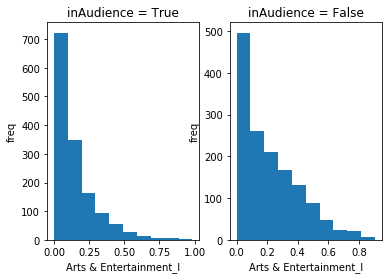

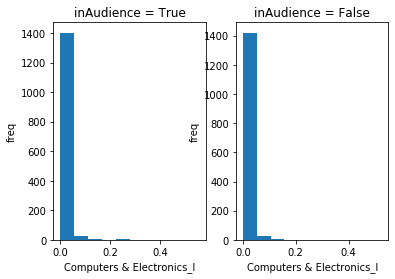

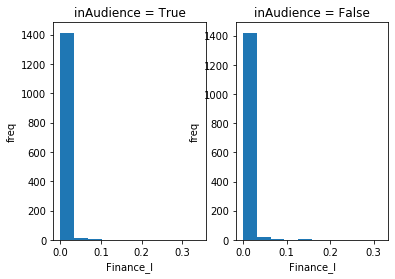

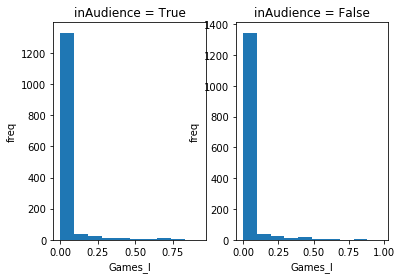

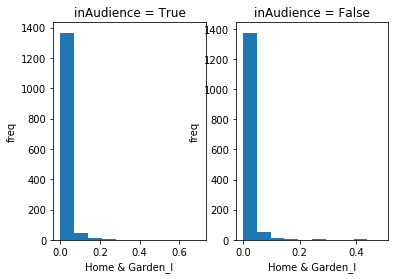

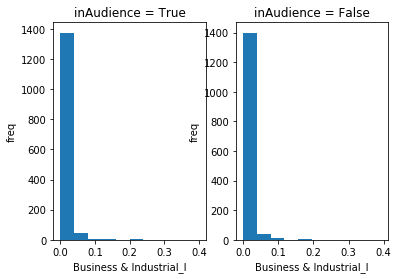

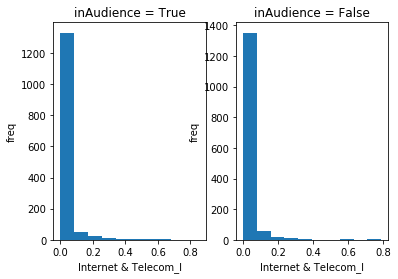

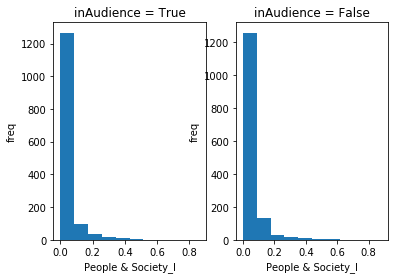

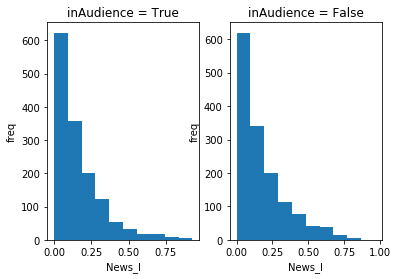

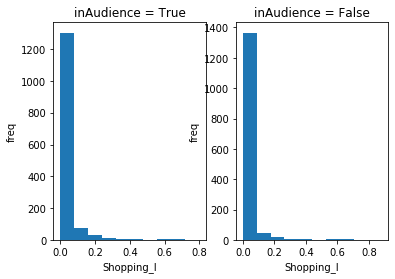

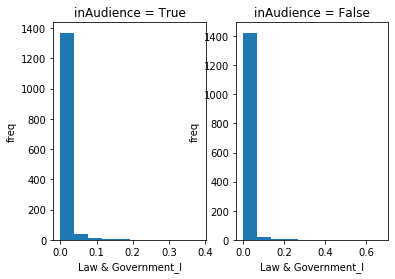

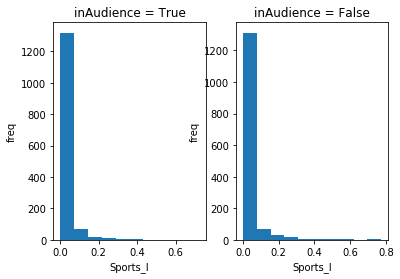

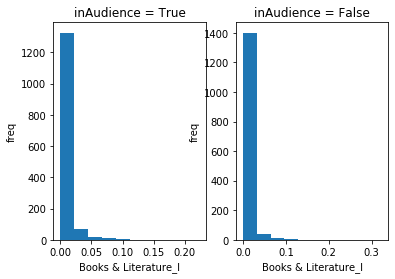

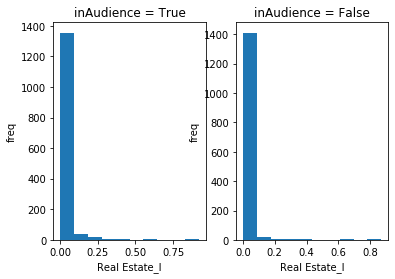

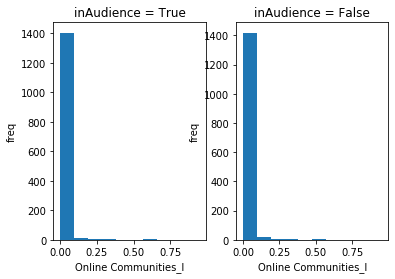

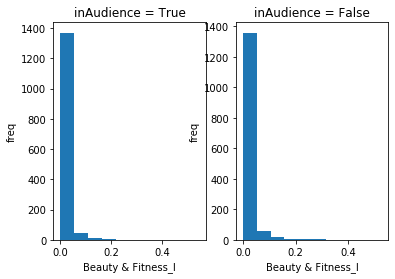

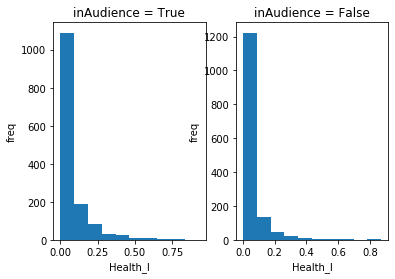

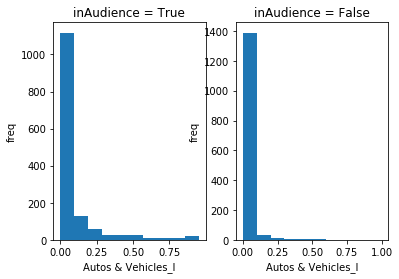

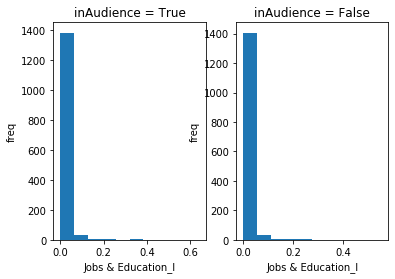

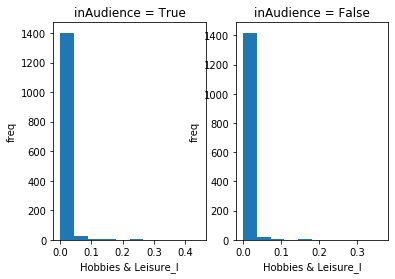

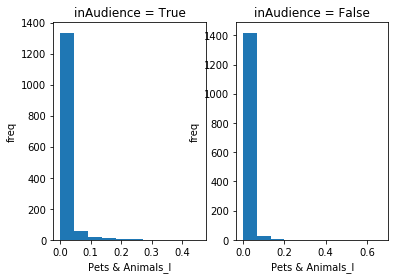

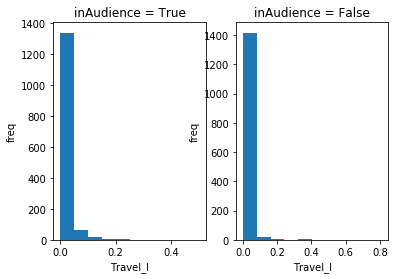

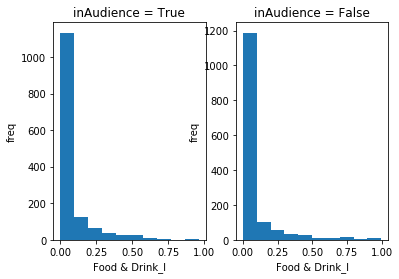

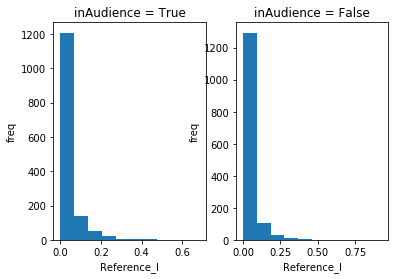

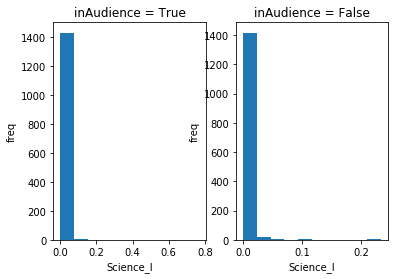

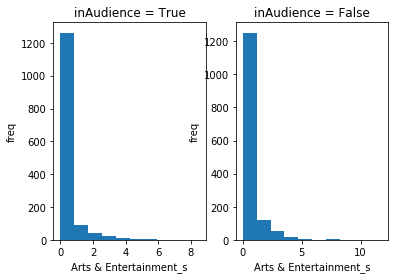

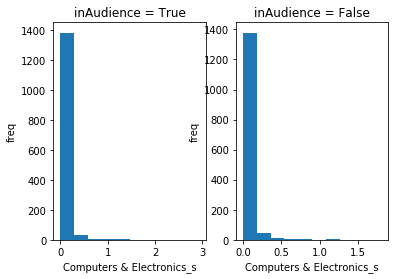

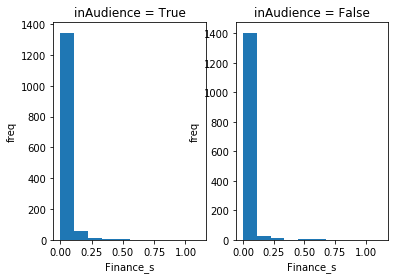

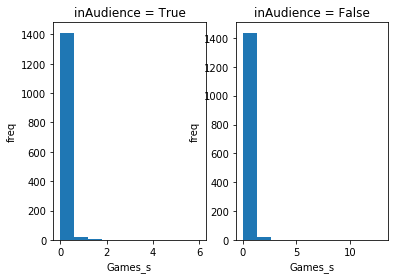

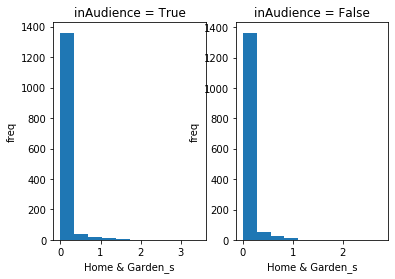

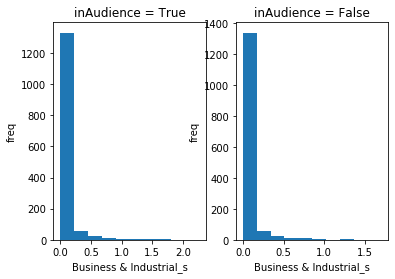

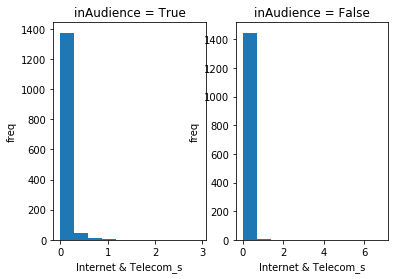

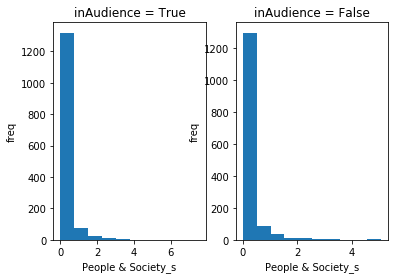

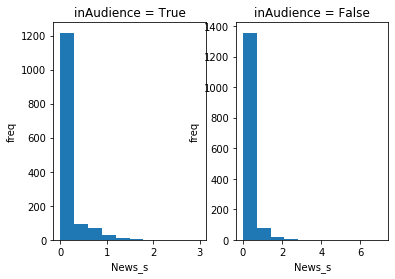

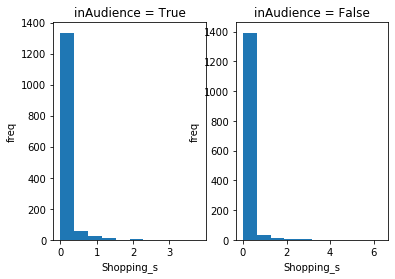

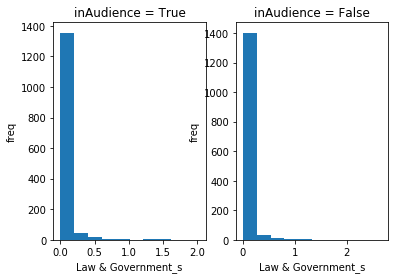

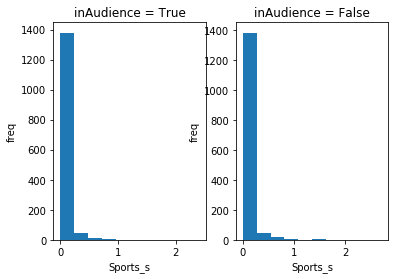

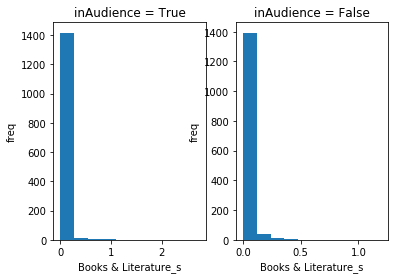

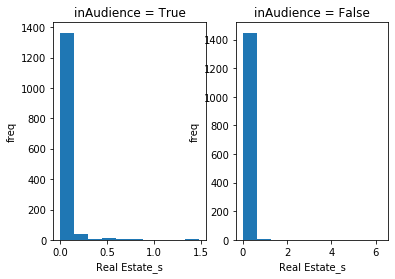

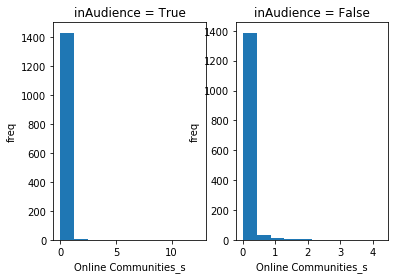

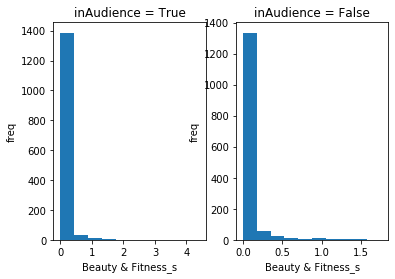

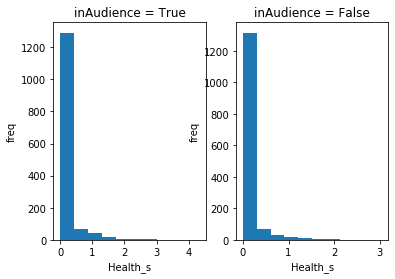

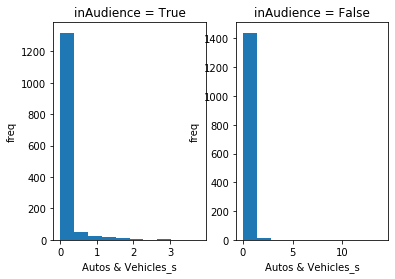

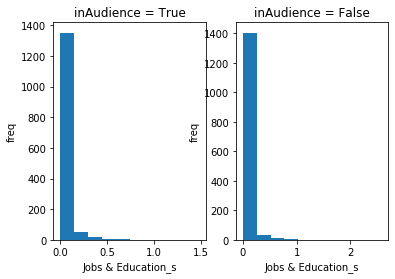

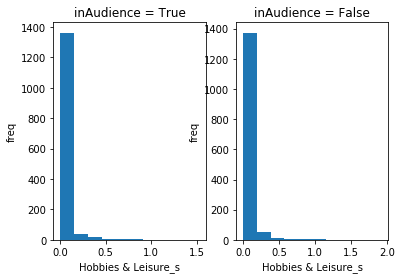

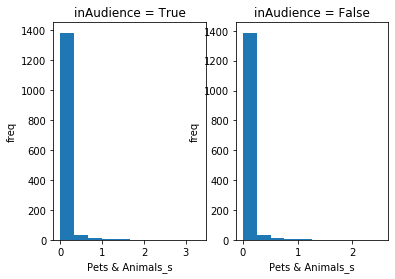

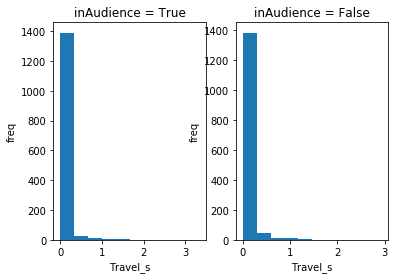

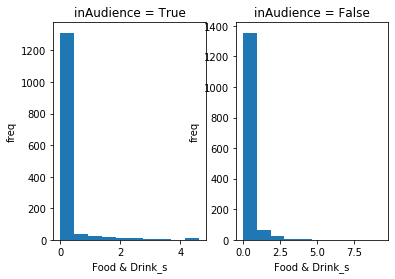

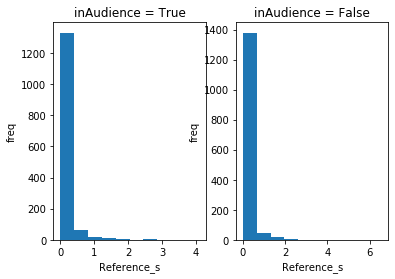

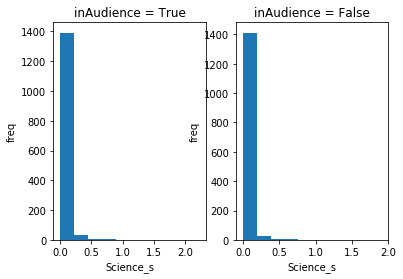

In [625]:
plot(df_downsampled,topic_features)

- Eventhough distributions of most features are left-skewed, we still could get some insights from these hitograms. For example, we see that for $\textbf{Arts & Entertainment_l}$, the distribution of converted customers is different from non-converted customers. Following this methodology, we selected following features [$\textbf{'Arts & Entertainment_l','News_l','Shopping_l','Books & Literature_l','Health_l','Autos & Vehicles_l','Finance_s'}$]

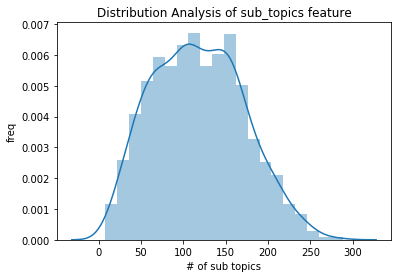

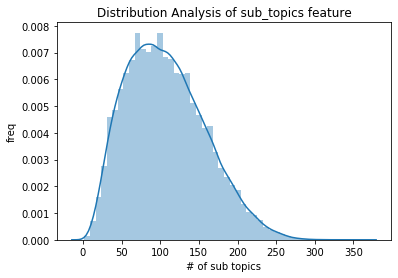

In [614]:
sns.distplot(training['sub_topics'].loc[:1465])
plt.xlabel('# of sub topics')
plt.ylabel('freq')
plt.title('Distribution Analysis of sub_topics feature')
plt.show()
sns.distplot(training['sub_topics'].loc[1465:])
plt.xlabel('# of sub topics')
plt.ylabel('freq')
plt.title('Distribution Analysis of sub_topics feature')
plt.show()

- the distribution of $\textbf{sub_topics}$ shows that indeed for some converted customers, they tend to be interested in more sub topics. Therefore, it confirmed our suspect and we decided to use this as one of our input features.

In [642]:
input_features = ['Arts & Entertainment_l','Health_l','Autos & Vehicles_l','Finance_s','sub_topics']

In [643]:
X = df_downsampled[input_features]
y = df_downsampled['inAudience'].replace(y_mapping)
X_validate =val_downsampled[input_features]
y_validate = val_downsampled['inAudience'].replace(y_mapping)

# Turkey's Method For Multiple outliers detection 

- From the distribution analysis for each feature, we found that there are outliers for each feature, therefore, we use Turkey's Method to detect if an observation has multiple outliers in different features. And drop that observation from our dataset.
- The following code is an implementation of Turkey's Method from the interenet.

In [644]:
from collections import Counter


def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

# detect outliers from list of features

#drop outliers in training
Outliers_to_drop = detect_outliers(df_downsampled, 2, input_features)
df_downsampled.drop(Outliers_to_drop,inplace=True)



# Model Training and Validating

- In this section we trained different ML models, specifically $\textbf{Decision Tree,Random Forest,AdaBoost,Gradient Boosting,XGBoost}$, the first get the training accuracy, and then did a 5-fold cross-validation on the resampled validation set to determine the best model.
- We used GridCVSearch to search the best parameters for a given model

In [645]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [646]:
clf = DecisionTreeClassifier(random_state = 2019)
param = {'criterion':['gini','entropy'],
        'max_depth':[3,6,9],
        'min_samples_split':[2,3,5],
        'min_samples_leaf':[1,5,8],
        'max_features':['auto','sqrt','log2']
        }
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X,y)
clf = grid.best_estimator_
print('Model:')
print(clf)
clf.fit(X,y)
pred = clf.predict(X)
print('Accuracy Score on training dataset: ')
print(accuracy_score(y,pred))
print('-----')
print('5-fold Cross Validation Score:')
cross_val = cross_val_score(clf,X,y,cv = 5)
print(cross_val)
print('-----')
print('Mean CV score:')
print(np.mean(cross_val))
y_pred = clf.predict(X_validate)
print('-----')
print('Accuracy Score on Validation set:')
print(accuracy_score(y_validate,y_pred))

Model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')
Accuracy Score on training dataset: 
0.6701208981001727
-----
5-fold Cross Validation Score:
[0.67586207 0.63903282 0.66839378 0.62867012 0.61418685]
-----
Mean CV score:
0.6452291277313457
-----
Accuracy Score on Validation set:
0.6685483870967742


In [647]:
clf  = RandomForestClassifier(random_state = 2019)
param = {'n_estimators':[4,6,9],
         'max_features':['log2','sqrt','auto'],
         'criterion':['entropy','gini'],
        'max_depth':[2,3,5,10],
        'min_samples_split':[2,3,5],
        'min_samples_leaf':[1,5,8]
        }
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X,y)
clf = grid.best_estimator_
print('Model:')
print(clf)
clf.fit(X,y)
pred = clf.predict(X)
print('Accuracy Score on training dataset: ')
print(accuracy_score(y,pred))
print('-----')
print('5-fold Cross Validation Score:')
cross_val = cross_val_score(clf,X,y,cv = 5)
print(cross_val)
print('-----')
print('Mean CV score:')
print(np.mean(cross_val))
y_pred = clf.predict(X_validate)
print('-----')
print('Accuracy Score on Validation set:')
print(accuracy_score(y_validate,y_pred))

Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=2019,
                       verbose=0, warm_start=False)
Accuracy Score on training dataset: 
0.6815198618307426
-----
5-fold Cross Validation Score:
[0.66206897 0.66321244 0.68048359 0.67357513 0.66089965]
-----
Mean CV score:
0.668047955332802
-----
Accuracy Score on Validation set:
0.6846774193548387


In [648]:
clf = AdaBoostClassifier(random_state = 2019)
param = {'n_estimators':[50,100,150,200,250],
        'learning_rate':[0.01,0.1,1],
        'algorithm':['SAMME','SAMME.R']
        }
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X,y)
clf = grid.best_estimator_
print('Model:')
print(clf)
clf.fit(X,y)
pred = clf.predict(X)
print('Accuracy Score on training dataset: ')
print(accuracy_score(y,pred))
print('-----')
print('5-fold Cross Validation Score:')
cross_val = cross_val_score(clf,X,y,cv = 5)
print(cross_val)
print('-----')
print('Mean CV score:')
print(np.mean(cross_val))
y_pred = clf.predict(X_validate)
print('-----')
print('Accuracy Score on Validation set:')
print(accuracy_score(y_validate,y_pred))

Model:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=250, random_state=2019)
Accuracy Score on training dataset: 
0.6749568221070812
-----
5-fold Cross Validation Score:
[0.67241379 0.64766839 0.68566494 0.68739206 0.67474048]
-----
Mean CV score:
0.6735759332267099
-----
Accuracy Score on Validation set:
0.6846774193548387


In [649]:
clf = GradientBoostingClassifier(random_state = 2019)
param = {'n_estimators':[50,100,150],
        'min_samples_split':[2,3,4],
        'max_depth':[3,4,5],
        'max_features':['auto','sqrt','log2'],
        'min_samples_leaf':[1,5,8]}
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X,y)
clf = grid.best_estimator_
print('Model:')
print(clf)
clf.fit(X,y)
pred = clf.predict(X)
print('Accuracy Score on training dataset: ')
print(accuracy_score(y,pred))
print('-----')
print('5-fold Cross Validation Score:')
cross_val = cross_val_score(clf,X,y,cv = 5)
print(cross_val)
print('-----')
print('Mean CV score:')
print(np.mean(cross_val))
y_pred = clf.predict(X_validate)
print('-----')
print('Accuracy Score on Validation set:')
print(accuracy_score(y_validate,y_pred))

Model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=2019, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy Score on training dataset: 
0.7395509499136442
-----
5-fold Cross Validation Score:
[0.66206897 0.66493955 0.69084629 0.66839378 0.65743945]
-----
Mean CV score:
0.6687376063837132
-----
Accuracy Score on Validation set:
0.6733870967741935


In [650]:
clf = XGBClassifier()
param = {'eta':[0.1,0.3,0.5,1],
        'gamma':[0,3,6],
        'max_depth':[3,6,9,10,12],
        'subsample':[0.5,1]}
grid = GridSearchCV(clf,param,scoring = 'accuracy')
grid = grid.fit(X,y)
clf = grid.best_estimator_
print('Model:')
print(clf)
clf.fit(X,y)
pred = clf.predict(X)
print('Accuracy Score on training dataset: ')
print(accuracy_score(y,pred))
print('-----')
print('5-fold Cross Validation Score:')
cross_val = cross_val_score(clf,X,y,cv = 5)
print(cross_val)
print('-----')
print('Mean CV score:')
print(np.mean(cross_val))
y_pred = clf.predict(X_validate)
print('-----')
print('Accuracy Score on Validation set:')
print(accuracy_score(y_validate,y_pred))

Model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)
Accuracy Score on training dataset: 
0.7274611398963731
-----
5-fold Cross Validation Score:
[0.67241379 0.65803109 0.68393782 0.66148532 0.66435986]
-----
Mean CV score:
0.6680455772257299
-----
Accuracy Score on Validation set:
0.6661290322580645


# Model Selection

- After the training and validating of our models, we see that $\textbf{Random Forest}$ has the highest mean CV score, therefore, we choose $\textbf{Random Forest}$ as our final model for this dataset.
- Eventhough we see that XGBoost gives a really high accuracy score on the training dataset, the average CV score is not that high, we conclude that XGBoost may overfitted on the training dataset

# Conclusion

- Given the accuracy score on our models, we conclude that the features we selected are good in general. Therefore, when Valassis looking for rare converted customers from large dataset, we recommend to sepefically look at long term interest in $\textbf{Arts & Entertainment, Autos & Vehicles}$ and short term interest in $\textbf{Finance}$
- Also, we strongly recommend Valassis to consider the number of sub topics a user would be interested in when predicting if a user would be converted

# Reference

[1]: $\textbf{Turkey's Method}$: https://gist.github.com/joseph-allen/14d72af86689c99e1e225e5771ce1600